In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MST_Prim(G,v_inicial):
            
    nx.set_node_attributes(G, np.Inf, 'lambda') # setar lambda 
    nx.set_node_attributes(G, None, 'pi') # setar pi
    
    lamb = {i: np.Inf for i in G.nodes().keys()} #dicionario do lambda dos vertices
    
    lamb[v_inicial] = 0 #lambda do v_inicial recebe 0
    
    G.node[v_inicial]['lambda'] = 0
    
    while bool(lamb):  #enquanto houver vertice no dicionario
        u = min(lamb, key=lamb.get)
        
        for v in nx.neighbors(G,u): #vizinhança de u
            if  v in lamb.keys() and G.edges[v,u]['weight'] < lamb[v]: #se aresta(u,v) < lambda[v]
                                                                       #e v ainda estiver no dic
                lamb[v] = G.edges[v,u]['weight']   #atualiza o lambda
                G.node[v]['lambda'] = G.edges[v,u]['weight']  
                G.node[v]['pi'] = u   #atualiza o pi - pai do vertice

        del lamb[u]  #tira o vertice u do dicionario

    resultados = {}  #dicionario com os resultados
    resultados['pi'] = nx.get_node_attributes(G,'pi')
    resultados['lambda'] = nx.get_node_attributes(G,'lambda') 
    
    Pr = pd.DataFrame(resultados) #Dataframe dos resultados 
    MST = nx.Graph() #Criação da arvore - MST
    MST.add_nodes_from(G)  #adição dos vertices
    
    for k in G.nodes().keys(): #Criacao das arestas na arvore a partir do pi
        if k != v_inicial:
            MST.add_edge(k,resultados['pi'][k], weight=resultados['lambda'][k])
    
    return (Pr,MST) #retorna uma tupla com o dataframe dos resultados e a arvore

In [3]:
A = np.loadtxt('ha30/ha30_dist.txt')
G = nx.from_numpy_matrix(A)

/home/caio/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


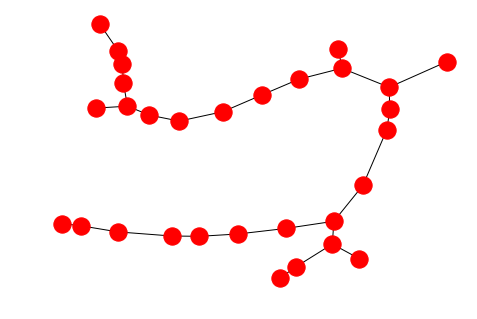

In [4]:
(TabResultados,T1) = MST_Prim(G,1)
if nx.is_tree(T1):
    nx.draw(T1)
    plt.show() # display

In [5]:
s = 0
for e in T1.edges:
    s += T1.edges[e[0],e[1]]['weight']
print(s)

403.0


In [11]:
TabResultados[14:]

,pi,lambda
14,28.0,4.0
15,18.0,9.0
16,0.0,24.0
17,2.0,10.0
18,7.0,8.0
19,16.0,3.0
20,15.0,15.0
21,2.0,5.0
22,4.0,12.0
23,10.0,9.0
